In [2]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec

# import 'seaborn'
import seaborn as sns
from statsmodels.stats.proportion import proportion_confint

# to test the normality 
import scipy.stats as st

# import the function to calculate the power of test
from statsmodels.stats import power

In [3]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 1-Sample Test

In [4]:
## Step 0: Normality Test - Shapiro Test
## Note: If the sample test is < 30 , not required to test else we test.
## Normality Test: 
## H0 : Population Data = Normal
## H1 : Population Data != Normal

st.shapiro(df.total_bill)

ShapiroResult(statistic=0.9197186231613159, pvalue=3.3244529351605934e-10)

Since the P value is cloase to 0 < alpha(0.05) --------> reject H0

Hence the Population Data is not in Normal

Since the normality test failed, we need to proceed for parametric test - i.e Wilcoxon Test

H0 : Polulation Median = 20
H1 : Polulation Median != 20

In [6]:
print("Median of the Total Bill Sample : ", df.total_bill.median())
median = 20
med_data = df.total_bill - median
st.wilcoxon(med_data)

Median of the Total Bill Sample :  17.795


WilcoxonResult(statistic=12643.5, pvalue=0.03703500887146945)

Since P value (0.03) > alpha(0.05) ---> Fail to reject H0;

Hence we conclude that the Sample does not belongs to the population of whose median is $20

In [ ]:
## Step 1: state H0 & H1 & level of significance ( alpha )

Test the Claim that averahe total bill is more for dinner rather than lunch ?

In [7]:
df.groupby('time')['total_bill'].describe()

C:\Users\lokesh\AppData\Local\Temp\ipykernel_30040\1293134793.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('time')['total_bill'].describe()


,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
Lunch,68.0,17.168676,7.713882,7.51,12.2350,15.965,19.5325,43.11
Dinner,176.0,20.797159,9.142029,3.07,14.4375,18.390,25.2825,50.81


C:\Users\lokesh\AppData\Local\Temp\ipykernel_30040\4099440273.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('time')['total_bill'].plot(kind='kde')


time
Lunch     Axes(0.125,0.11;0.775x0.77)
Dinner    Axes(0.125,0.11;0.775x0.77)
Name: total_bill, dtype: object

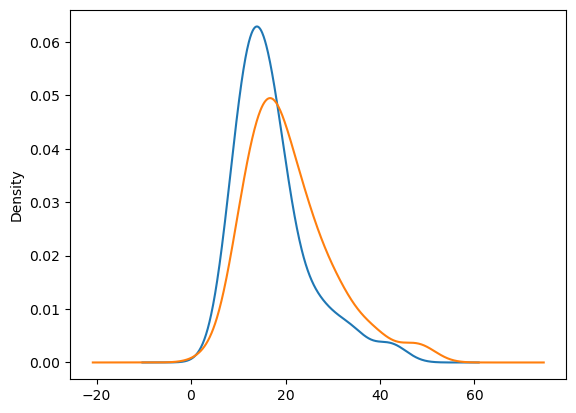

In [8]:
df.groupby('time')['total_bill'].plot(kind='kde', legend=)

c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='time', ylabel='total_bill'>

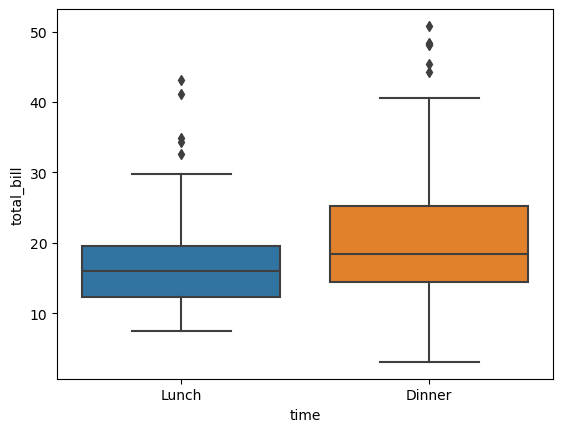

In [9]:
sns.boxplot(data=df, y='total_bill', x='time')

In [4]:
tb_lunch = df[df.time == "Lunch"].total_bill
tb_dinner = df[df.time == "Dinner"].total_bill

#### Assumption 1: test of normality ( bypassing this step as sample size is > 30)
#### Assumption 2: Variance equality test 

> H0: pop1 var = pop2 var

> H1: pop1 var != pop2 var

In [11]:
st.levene(tb_lunch, tb_dinner)

LeveneResult(statistic=2.6906995489829337, pvalue=0.1022346107726258)

Since p value (0.1) is > alpha (0.05) ---> fail to reject H0;

Hence we can say that the population variances are Equal

In [5]:
## Step 1: H0: mu_tb_dinner <= mu_tb_lunch
#          H1: mu_tb_dinner > mu_tb_lunch
alpha = 0.05 
# We have choosen independent 2 samples test of mean, so we can go with T-tets
# irrespective of sample size go for T-test, when not aware of population standard deviation
# Hence use 2 sample independent test.
st.ttest_ind(tb_dinner, tb_lunch, equal_var=True, alternative='greater') 
# since population variances are equal we have given equal_var as True and alternative as greater because the claim is about verifying greater value on dinner.

Ttest_indResult(statistic=2.8976375218366424, pvalue=0.002052310703797837)

In [6]:
alpha = 0.05
n1 = len(tb_dinner)
n2 = len(tb_lunch)
xbartd = tb_dinner.mean()
xbartl = tb_lunch.mean()
sdt = tb_dinner.std()
slt = tb_lunch.std()
pooled_var = ((n1-1) * sdt ** 2 + (n2 - 1) * slt ** 2) / (n1+n2 -2 ) # Sp shoud be sqrt this is done in next line , pooled variance is denoted as Sp
se = np.sqrt(pooled_var* ((1/n1) + 1/n2))
tstat = (xbartd - xbartl) / se
pvalue = st.t.sf(tstat, n1+n2-2)
t_cirt = st.t.isf(alpha / 2, n1+n2-2)

print(tstat, pvalue, t_cirt)

2.8976375218366424 0.002052310703797837 1.9698151341345516


In [10]:
#  similarly inverse of the previous will be alternative as less
st.ttest_ind( tb_lunch,tb_dinner, equal_var=True, alternative='greater') 
# in 1-tile testing always pvalue should be lessthan 0.5 since the population is devided into two equal parts either left or right tile test 
# Hence the p value for this population is 0.997, which is incorrect and can notifed as incorrect sampling or parameters.
# Here the sample we have considered is sample of lunch is greater than sample of dinner with respect to total_bill which is invalid statement as dinner is greater than lunch

Ttest_indResult(statistic=-2.8976375218366424, pvalue=0.9979476892962021)

In [11]:
st.ttest_ind( tb_lunch,tb_dinner, equal_var=True, alternative='less') 
# Here the above statement can be corrected with alternative as less than

Ttest_indResult(statistic=-2.8976375218366424, pvalue=0.002052310703797837)

#### Since P value(0.002) < alpha(0.05) ----> reject H0; and accept H1;
#### Hence we conclude that avg tb for dinner is greater than lunch.

In [12]:
## In  Case of Non Parameteric: When test of normality fails
## test of normality
print(st.shapiro(tb_lunch), st.shapiro(tb_dinner))

ShapiroResult(statistic=0.8687172532081604, pvalue=3.6405290302354842e-06) ShapiroResult(statistic=0.9328962564468384, pvalue=2.6871040859077766e-07)


Since Normality test is failed --> non parametric -- Mann Whitney U test

In [13]:
## H0: popmedian_tb_dinner <= popmedian_tb_lunch
## H1: popmedian_tb_dinner > popmedian_tb_lunch

st.mannwhitneyu(tb_dinner, tb_lunch, alternative="greater")

MannwhitneyuResult(statistic=7587.5, pvalue=0.0005916253114233414)

Since p value (0.0005) < alpha (0.05) --> reject H0;

Hence we conclude that population median of tb_dinner is greater than tb_lunch 

In [14]:
## Test the claim that the weight reduction program is effective in reduction of weight with below sample data of 10 people at 1% level of significance
wt_before = np.array([90, 87, 67, 99, 110, 88, 78, 77, 97, 100])
wt_after = np.array([80, 77, 77, 89, 90, 78, 78, 87, 87, 90])

In [15]:
## Step 0: Normality test
## So here the test of normality will be done on the diffrence value, instead of actual values
diff = wt_before - wt_after
print("Difference values before and after", diff)

st.shapiro(diff)

[ 10  10 -10  10  20  10   0 -10  10  10]


ShapiroResult(statistic=0.8007019758224487, pvalue=0.014786158688366413)

Since p value (0.014) > alpha(0.01) --> fail to reject H0;

Hence we can conclude that the population data is normal at 1% level of significance.

In [18]:
# H0: popdiff_mean <= 0
# H1: popdiff_mean > 0
# Parametric Test

mu_d = 0
alpha = 0.01
dbar = np.mean(diff)
n = len(diff)
sd = np.std(diff, ddof=1)
se = sd / np.sqrt(n)
t_stats = (dbar - mu_d) / se
t_stats


1.9639610121239317

In [20]:
p_value = st.t.sf(t_stats, n-1)
p_value

0.04056309442292025

In [19]:
st.ttest_rel(wt_before, wt_after, alternative="greater")

TtestResult(statistic=1.9639610121239313, pvalue=0.04056309442292028, df=9)

Since p value is 0.04 > alpha 0.01 ---> Failed to Reject H0;

Hence we can conclude that there is no effective reduction in weight @ 1% level of significance


In [21]:
## Lets look at 5% Level of significance
alpha = 0.05
st.shapiro(diff)

ShapiroResult(statistic=0.8007019758224487, pvalue=0.014786158688366413)

In [23]:
## Since Normality Test Failed --> go for Parametric Test
## H0 : pop_median_diff <= 0
## H1 : pop_median_diff > 0

st.wilcoxon(wt_before, wt_after, alternative="greater")

WilcoxonResult(statistic=36.0, pvalue=0.0416322583317752)

In [24]:
np.median(diff)

10.0

Since p_value (0.04) < alpha(0.05) --> We Reject H0

Hence we can conclude that the pop median > 0; it is effective considering median value.

## Test of Proportion

In [26]:
df.smoker.value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

Test the restaurent manager claim that 35% of transactions are consuming smoking material @ 5% level of signinficance

H0: P = 0.35

H1: P != 0.35

In [30]:
P = 0.35
alpha = 0.05
X = 93
n = len(df.smoker)
p = X/n
std_err = np.sqrt(p*(1-p) / n)

z_stats = (p-P) / std_err
zalphaby2 = st.norm.isf(alpha / 2)
print(abs(z_stats), zalphaby2)

1.001794302793041 1.9599639845400545


based on Critical Value Approach (CVA) since abs of z_stats = 1.00 < abs of zalphaby2 = 1.96 ---> Failed to reject H0;

In [31]:
p_value = st.norm.sf(abs(z_stats)) * 2
p_value

0.31644294939901374

based on p value (0.316) > alpha (0.05) ---> Fail to reject H0;

Hence we can conclude that the 35% of Transactions are made by Smokers

In [34]:
st.norm.interval(1-alpha, p, std_err)

(0.32020882495712305, 0.44208625701009)

In [35]:
P = 0.30
alpha = 0.05
X = 93
n = len(df.smoker)
p = X/n
std_err = np.sqrt(p*(1-p) / n)

z_stats = (p-P) / std_err
zalphaby2 = st.norm.isf(alpha / 2)

st.norm.sf(abs(z_stats)) * 2

0.00905586896709222

In [43]:
P = 0.55
alpha = 0.05
X = 93
n = len(df.smoker)
p = X/n
std_err = np.sqrt(p*(1-p) / n)

z_stats = (p-P) / std_err
zalphaby2 = st.norm.isf(alpha / 2)

st.norm.sf(abs(z_stats)) * 2

5.610838241986511e-08

In [47]:
from statsmodels.stats.proportion import proportions_ztest

proportions_ztest(X, n, 0.4)

(-0.6063491832694735, 0.5442829052719291)

Test the restaurent manager claim that % of transactions are different for male and female @ 5% level of significance

H0: Pms = Pfs

H1: Pms != Pfs

In [48]:
pd.crosstab(df.sex, df.smoker)

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [50]:
xm = 60
nm = 157 # sample size of men
xf = 33
nf = 87 # vice versa of nm
pm = xm / nm
pf = xf / nf
p = 93 / 244 # Probability of smoking
std_err = np.sqrt(p*(1-p)*((1/nf)+ (1/nm)))
z_stats = (pm-pf) / std_err
zalphaby2 = st.norm.isf(alpha / 2)

print(z_stats, zalphaby2)

0.043986572230939734 1.9599639845400545


In [52]:
st.norm.sf(z_stats)*2

0.9649151073157315

In [51]:
proportions_ztest([xm,xf], [nm, nf])

(0.043986572230939734, 0.9649151073157315)

In [53]:
pd.crosstab(df.time, df.smoker)

smoker,Yes,No
time,,
Lunch,23,45
Dinner,70,106


In [54]:
proportions_ztest([23,70], [68, 176])

(-0.8578950631176205, 0.390950410537768)

Based on this above OP the percentage of smoking during Lunch is less compared to Dinner.
But from the p_value (0.39)  

Test the Claim that is there any association b/w smoking and Day @ 5% level of significance? 

In [55]:
## Chisquare Critical at alpha = 0.05
st.chi2.isf(0.05, 3) 

7.814727903251178

In [56]:
pd.crosstab(df.day, df.smoker)

smoker,Yes,No
day,,
Thur,17,45
Fri,15,4
Sat,42,45
Sun,19,57


In [57]:
st.chi2_contingency(pd.crosstab(df.smoker, df.day))

Chi2ContingencyResult(statistic=25.787216672396262, pvalue=1.0567572499836523e-05, dof=3, expected_freq=array([[23.63114754,  7.24180328, 33.15983607, 28.96721311],
       [38.36885246, 11.75819672, 53.84016393, 47.03278689]]))

In [60]:
# P Value
st.chi2.sf(25.7872, 3)

1.056765741575514e-05

In [61]:
## Chisquare Critical at alpha = 0.05
st.chi2.isf(0.05, 3)

7.814727903251178

Based on p value approach:
since p value (close to 0) < alpha(0.05) ---> Fail to reject H0;

Hence there is an association between smoking and day

### ANOVA
Test claim that the total bill is diffrent from Thus to Sun @ 5% level of Significance ?

In [63]:
df_by_days = df.groupby('day').total_bill
df_by_days.describe()

C:\Users\lokesh\AppData\Local\Temp\ipykernel_18816\1279814473.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_by_days = df.groupby('day').total_bill


,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,17.682742,7.886170,7.51,12.4425,16.20,20.1550,43.11
Fri,19.0,17.151579,8.302660,5.75,12.0950,15.38,21.7500,40.17
Sat,87.0,20.441379,9.480419,3.07,13.9050,18.24,24.7400,50.81
Sun,76.0,21.410000,8.832122,7.25,14.9875,19.63,25.5975,48.17


In [73]:
Thubt = df[df.day == 'Thur'].total_bill
Fribt = df[df.day == 'Fri'].total_bill
Satbt = df[df.day == 'Sat'].total_bill
Sunbt = df[df.day == 'Sun'].total_bill

day
Thur    Axes(0.125,0.11;0.775x0.77)
Fri     Axes(0.125,0.11;0.775x0.77)
Sat     Axes(0.125,0.11;0.775x0.77)
Sun     Axes(0.125,0.11;0.775x0.77)
Name: total_bill, dtype: object

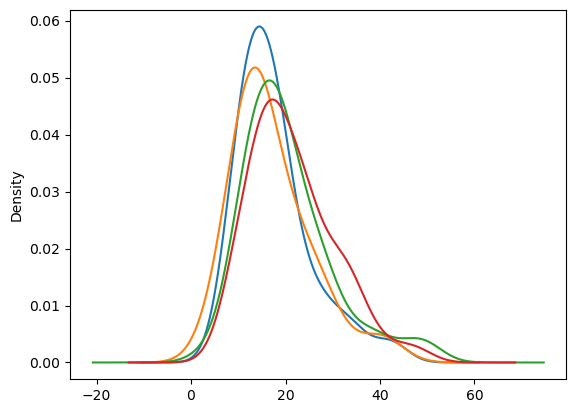

In [65]:
df_by_days.plot(kind='kde')

c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='day', ylabel='total_bill'>

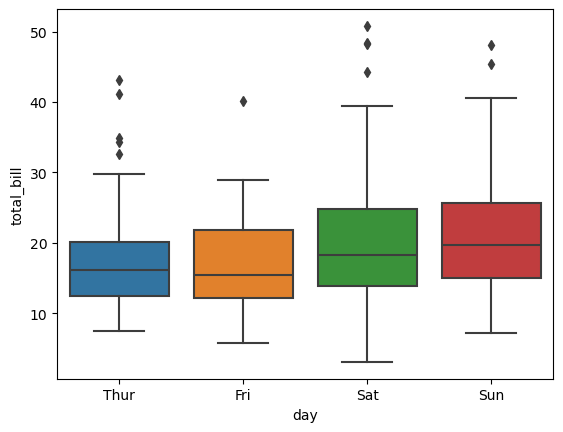

In [71]:
sns.boxplot(y=df.total_bill, x=df.day)

In [76]:
### Assumption -1 : test Normality
print(st.shapiro(Thubt), st.shapiro(Fribt), st.shapiro(Satbt), st.shapiro(Sunbt), sep='\n')

ShapiroResult(statistic=0.8844887018203735, pvalue=2.8571173970703967e-05)
ShapiroResult(statistic=0.8957934379577637, pvalue=0.04085628688335419)
ShapiroResult(statistic=0.9034753441810608, pvalue=7.991795428097248e-06)
ShapiroResult(statistic=0.9479387402534485, pvalue=0.0035658981651067734)


Note: Bypassing this normality if the sample sizes are > 30;

Ftb is following normal based on p value (0.04) > alpha (0.01)

In [77]:
### Assumption 2: Variance Equality
st.levene(Thubt, Fribt, Satbt, Sunbt)

LeveneResult(statistic=0.6653578279881612, pvalue=0.5740792267812198)

Since P value is (0.5) > alpha (0.01) ---> Fail to reject H0;

Hence we can conclude that all population variances are equal


> H0: All pop means are equal

> H1: one of the pop means are different

In [78]:
st.f_oneway(Thubt, Fribt, Satbt, Sunbt)

F_onewayResult(statistic=2.7674794432863363, pvalue=0.04245383328952047)

In [79]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [80]:
m1 = ols('df.total_bill~day', data=df).fit()
anova_table = anova_lm(m1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
day,3.0,643.941362,214.647121,2.767479,0.042454
Residual,240.0,18614.522721,77.560511,NaN,NaN


In [81]:
## F critical
st.f.isf(0.01, 3, 240)

3.8642309599914926

In [82]:
## p value 
st.f.sf(2.767479, 3, 240)

0.042453857901598724

In [83]:
## Non parametric test - Krushkal Wallis
# H0: all pop means are equal
# H1: any one pop median is different

st.kruskal(Thubt, Fribt, Satbt, Sunbt)

KruskalResult(statistic=10.403076391437086, pvalue=0.01543300820104127)

Based on p value (0.015) > alpha(0.01) ---> Accept H0;

Hence all pop means are equal

## **Goodness of fit test**
Test the claim that the random machine 1 to 5 is fit for goodness with the sample runs of 100 times, obs = [23,15,19, 24,19].

In [84]:
obs = np.array([23,15,19, 24,19])
exp = np.array([20]*5)

### Assumptions
> H0: It it good fit (Obs = Exp)

> H1: It is not good fit (Obs != Exp)

In [85]:
st.chisquare(obs, exp)

Power_divergenceResult(statistic=2.5999999999999996, pvalue=0.6268231239782291)

In [88]:
## Chisquare Critical Value
st.chi2.isf(0.05, 4)

9.487729036781158

In [87]:
## P value 
st.chi2.sf(2.5999999999999996, 4) # no of col - 1 or no of rows - 1

0.6268231239782291

Since P value is (0.62) > alpha (0.05) --> Fail to reject H0;

Hence we can conclude that the machine is good fit for randomness